In [1]:
import os
import sys
import numpy as np
import torch
import ast
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
sys.path.append("../authorship_attribution/")
sys.path.append("../obfuscated_ast_similarity//")

In [3]:
import model as ast_model
import train as ast_train
import utilities as ast_utilities
import obfuscation
import json
import obfuscated_trainer

In [4]:
# model_params = {
#     "n_classes":108,
#     "encoder_params": {
#         "embedding_dims":100,
#         "dropout":0.2,
#         "num_layers":1, "rnn_dropout":0.0
#     },
#     'reqularizer_alpha':0.001
# }

# path = "experiments/gcj_108_108/no_names/"

In [5]:
# complete_model = ast_model.Model(model_params)

In [10]:
# os.path.join(path, "best_state", "components", "ast_encoder_params.json")

In [11]:
path = 'experiments/gcj_108_108/no_names/2'

In [12]:
# complete_model = ast_utilities.load_plain_model(complete_model, )
# model_params = json.loads(open(os.path.join(path, "components", "ast_encoder_params.json")).read())
model_params = json.loads(open(os.path.join(path, "best_state", "components", "ast_encoder_params.json")).read())
# original_path = "../authorship_attribution/experiments/GCJ-108/plain/"

In [13]:
ast_encoder = ast_model.ASTEncoder(model_params)
# ast_encoder.load(os.path.join(path, "best_state", "components"))

In [14]:
batcher = obfuscated_trainer.Batcher({}, 0.8)
# batcher.load_from_attribution_batcher(original_path)
batcher.load(path)

In [30]:
# batcher.train_data

In [15]:
# data = ast_utilities.read_all_gcj()

In [16]:
# data = ast_utilities.filter_by_count(data, 35, 1000)
# batcher = obfuscated_trainer.Batcher(data, 0.8)

In [17]:
# batcher.train_data

In [18]:
# obfuscation_params = {
#     'add_kvargs':0.4,
#     'add_args':0.5,
#     'args_max_add':5,
#     'add_call_args':0.5,
#     'call_args':3,
#     'call_kwargs':3,
#     'if_swap':0.5,
#     'modify_body':0.5,
#     'n_modification_depth':3,
#     'max_trash_to_body':1,
#     'swap_in_body':0.5
# # 

In [19]:
# obfuscation_params = {
#     'add_kvargs':0.5,
#     'add_args':0.5,
#     'args_max_add':5,
#     'add_call_args':0.5,
#     'call_args':3,
#     'call_kwargs':3,
#     'if_swap':0.5,
#     'modify_body':0.5,
#     'n_modification_depth':3,
#     'max_trash_to_body':3,
#     'swap_in_body':0.5
# }

# obfuscation_params = {
#     'add_kvargs':0.8,
#     'add_args':0.8,
#     'args_max_add':8,
#     'add_call_args':0.8,
#     'call_args':5,
#     'call_kwargs':5,
#     'if_swap':0.7,
#     'modify_body':0.7,
#     'n_modification_depth':5,
#     'max_trash_to_body':5,
#     'swap_in_body':0.6
# }

# obfuscation_params = {
#     'add_kvargs':0.3,
#     'add_args':0.3,
#     'args_max_add':3,
#     'add_call_args':0.5,
#     'call_args':3,
#     'call_kwargs':3,
#     'if_swap':0.4,
#     'modify_body':0.4,
#     'n_modification_depth':2,
#     'max_trash_to_body':5,
#     'swap_in_body':0.5
# }

obfuscation_params = {
    'add_kvargs':0.3,
    'add_args':0.3,
    'args_max_add':10,
    'add_call_args':0.5,
    'call_args':10,
    'call_kwargs':10,
    'if_swap':0.5,
    'modify_body':0.4,
    'n_modification_depth':3,
    'max_trash_to_body':5,
    'swap_in_body':0.5
}

# obfuscation_params = {
#     'add_kvargs':0.0,
#     'add_args':0.0,
#     'args_max_add':0,
#     'add_call_args':0.0,
#     'call_args':0,
#     'call_kwargs':0,
#     'if_swap':0.0,
#     'modify_body':0.0,
#     'n_modification_depth':0,
#     'max_trash_to_body':0,
#     'swap_in_body':0.0
# }



In [20]:
# batcher.classes
# batcher.train_data

In [21]:
long_names = obfuscated_trainer.order_names_by_count(batcher)

[13, 12, 12, 15, 16, 12, 12, 21, 13, 12, 16, 17, 16, 12, 12, 12, 12, 17, 14, 18, 14, 16, 22, 13, 14, 12, 13, 20, 12, 15, 12, 14, 12, 13, 14, 16, 17, 24, 12, 14, 12, 12, 15, 12, 12, 37, 16, 15, 12, 12, 18, 33, 18, 12, 16, 12, 28, 30, 20, 34, 13, 18, 19, 12, 12, 12, 12, 17, 12, 12, 16, 16, 19, 24, 12, 13, 13, 12, 12, 13, 31, 13, 15, 17, 14, 17, 16, 32, 20, 12, 13, 12, 12, 26, 24, 19, 12, 18, 20, 17, 20, 12, 13, 13, 16, 13, 12, 13]


In [22]:
obfuscated_trainer.validate(ast_encoder, batcher, long_names, obfuscation_params, n_first_for_person=10, n_obfuscated=2)

KeyboardInterrupt: 

In [23]:

# trainer_params = dict(
#     n_epochs = 200,
#     n_obfuscated = 25,
#     validate_every = 5,
#     n_problems_validation = 50,
#     validate_n_problems = 50,
#     train_n_problems = 50,
#     regularizer_coef = 0.001,
#     n_adversarial = 100,
#     adversarial_coef = 1
# )


trainer_params = dict(
    n_epochs = 200,
    n_obfuscated = 25,
    validate_every = 5,
    n_problems_validation = 50,
    validate_n_problems = 10,
    train_n_problems = 10,
    regularizer_coef = 0.000,
    n_adversarial = 10,
    adversarial_coef = 1
)

trainer_params = dict(
    n_epochs = 200,
    n_obfuscated = 2,
    validate_every = 3,
    n_problems_validation = 5,
    validate_n_problems = 10,
    train_n_problems = 1,
    regularizer_coef = 0.000,
    n_adversarial = 10,
    adversarial_coef = 1
)

In [24]:
track_metric = {
    "metric_name":"loss",
    "function":ast_train.validate_max
}

In [25]:
# batcher = obfuscated_trainer.Batcher(data, 0.8)

In [26]:
# path = "./experiments/gcj_108_108/no_names/"
if os.path.exists(path):
    raise ValueError()

ValueError: 

In [27]:
trainer = obfuscated_trainer.Trainer(ast_encoder, torch.optim.Adam(ast_encoder.parameters()), path=path, track_metric=track_metric)

In [28]:
trainer.load(os.path.join(path, "best_state"))

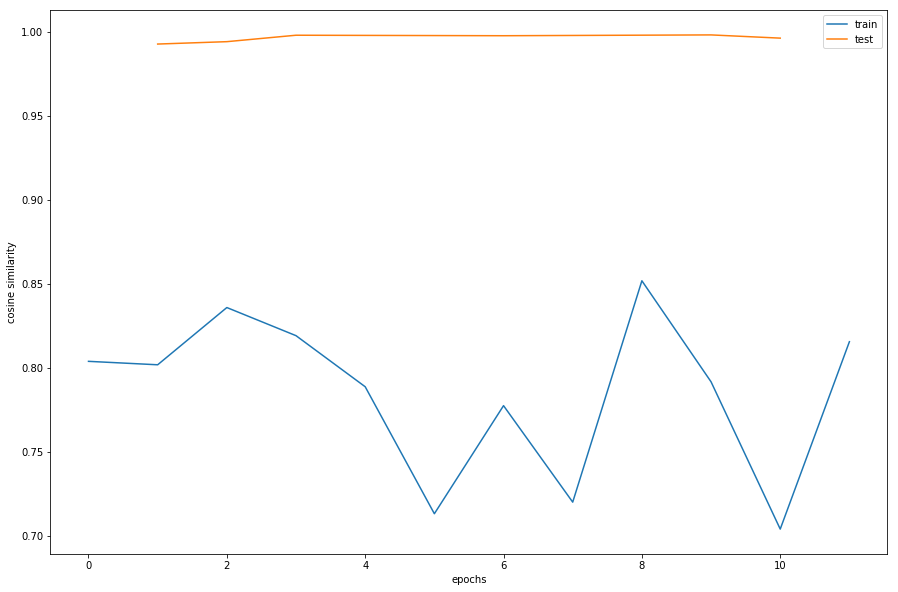

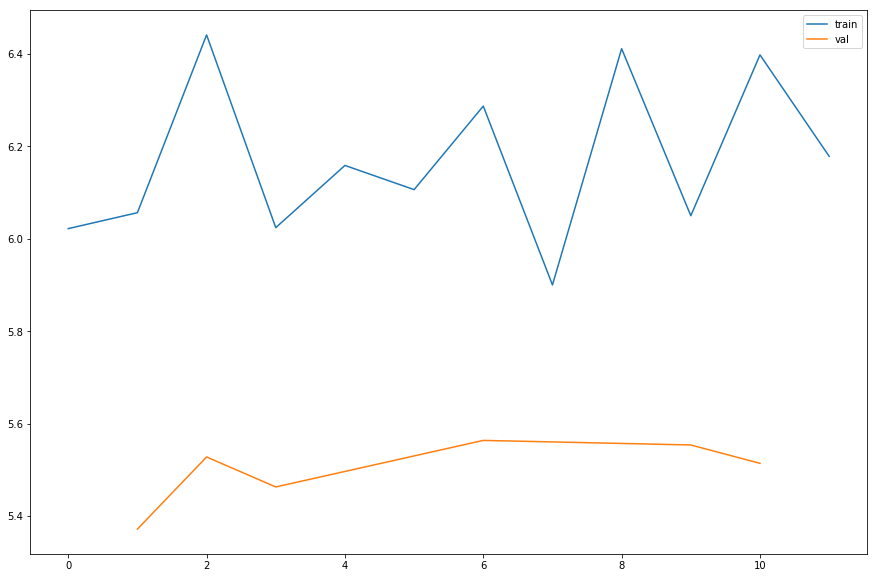

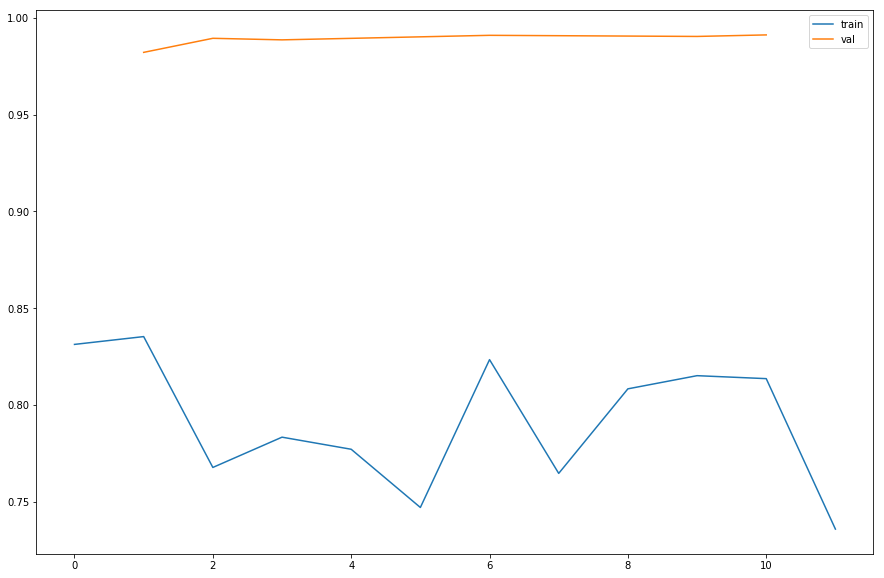

KeyboardInterrupt: 

In [38]:
trainer.train(batcher, trainer_params, obfuscation_params)

In [45]:
trainer.train_metrics

defaultdict(list,
            {'adversarial': [0.8311978578567505,
              0.8352341055870056,
              0.767600953578949,
              0.7832537293434143,
              0.7770034670829773,
              0.746921181678772,
              0.8233246207237244,
              0.7645360231399536,
              0.8082294464111328,
              0.8150361776351929],
             'loss': [0.8039384484291077,
              0.8018888235092163,
              0.8359566926956177,
              0.8192140460014343,
              0.7888190746307373,
              0.713245689868927,
              0.7775598764419556,
              0.7201482057571411,
              0.8518815636634827,
              0.7917466163635254],
             'regularizer': [6.021681785583496,
              6.05615234375,
              6.440823078155518,
              6.023799896240234,
              6.15839958190918,
              6.106046676635742,
              6.2868123054504395,
              5.899805068969727,
     

In [28]:
obfuscated_trainer.validate(ast_encoder, batcher, long_names, obfuscation_params, n_first_for_person=10, n_obfuscated=2)

KeyboardInterrupt: 

In [108]:
# batcher.dump("./experiments/gcj_108_108/no_names/", override=True)